In [ ]:
import requests
import pandas as pd

url = "https://data.cityofnewyork.us/resource/h9gi-nx95.csv?$limit=1000"
res = requests.get(url)
res.raise_for_status()
open("nyc_collisions.csv", "wb").write(res.content)
df = pd.read_csv("nyc_collisions.csv")


print(df[['crash_date', 'crash_time', 'latitude', 'longitude',
          'contributing_factor_vehicle_1', 'number_of_persons_injured']].head())


                crash_date crash_time  latitude  longitude  \
0  2021-09-11T00:00:00.000       2:39       NaN        NaN   
1  2022-03-26T00:00:00.000      11:45       NaN        NaN   
2  2023-11-01T00:00:00.000       1:29  40.62179 -73.970024   
3  2022-06-29T00:00:00.000       6:55       NaN        NaN   
4  2022-09-21T00:00:00.000      13:21       NaN        NaN   

  contributing_factor_vehicle_1  number_of_persons_injured  
0  Aggressive Driving/Road Rage                          2  
1             Pavement Slippery                          1  
2                   Unspecified                          1  
3         Following Too Closely                          0  
4           Passing Too Closely                          0  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Clean and prepare
df = df.dropna(subset=['crash_date','crash_time','latitude','longitude'])
df['datetime'] = pd.to_datetime(df['crash_date'] + ' ' + df['crash_time'], errors='coerce')
df = df.dropna(subset=['datetime'])
df['hour'] = df['datetime'].dt.hour


/tmp/ipython-input-18-1083722237.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['crash_date'] + ' ' + df['crash_time'], errors='coerce')


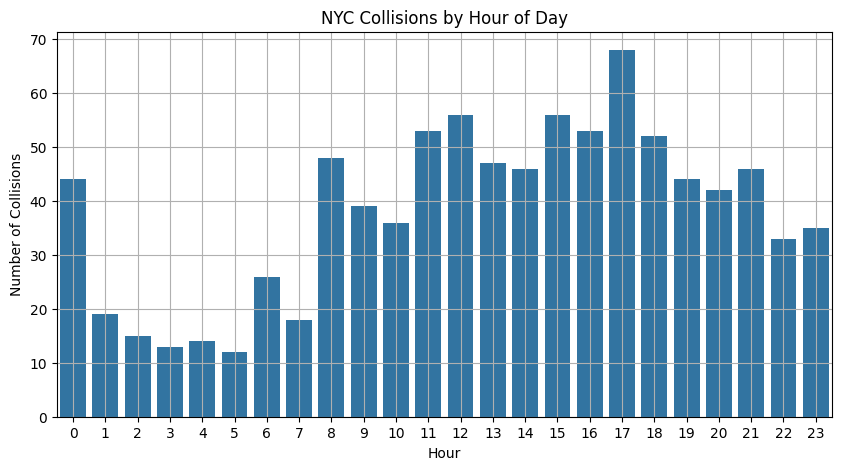

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='hour', data=df)
plt.title("NYC Collisions by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Collisions")
plt.grid(True)
plt.show()


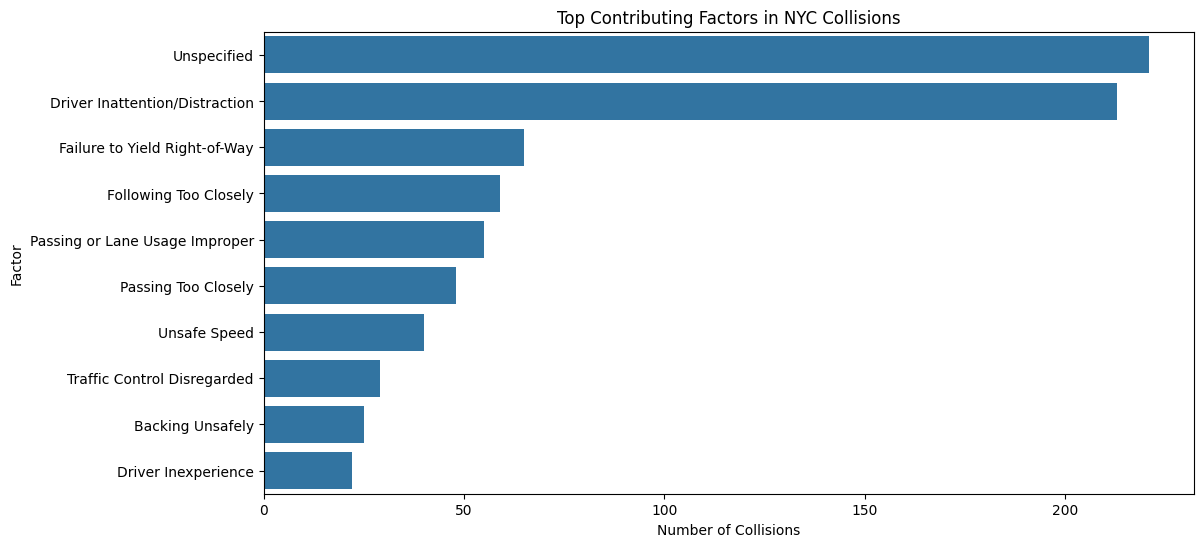

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y='contributing_factor_vehicle_1',
              data=df,
              order=df['contributing_factor_vehicle_1'].value_counts().index[:10])
plt.title("Top Contributing Factors in NYC Collisions")
plt.xlabel("Number of Collisions")
plt.ylabel("Factor")
plt.show()


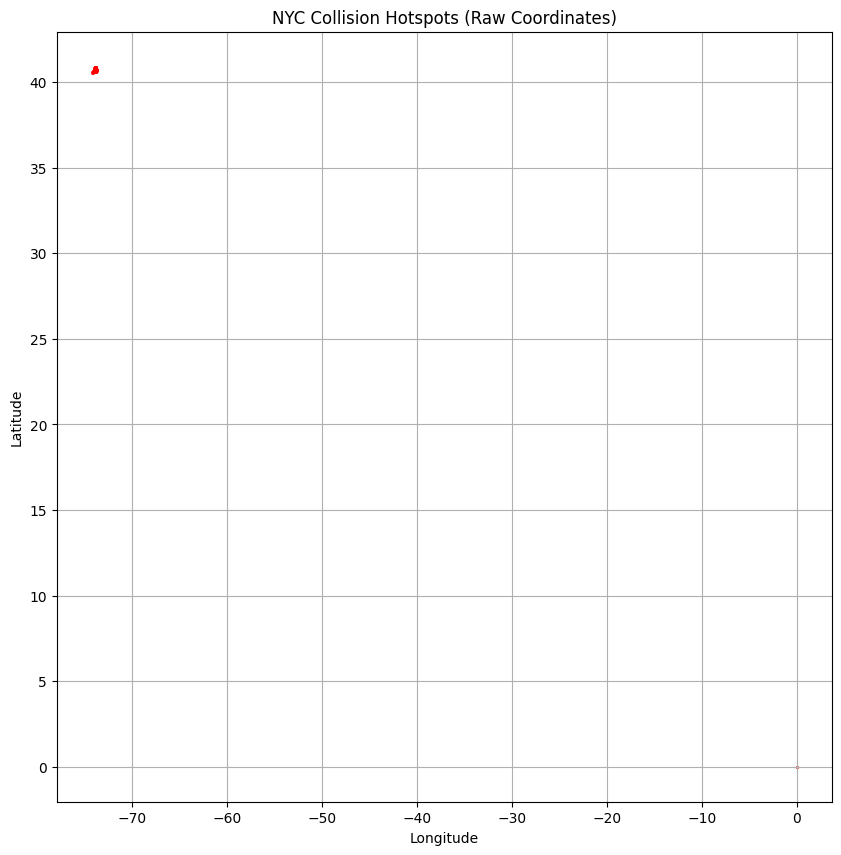

In [ ]:
import matplotlib.pyplot as plt

# Ensure data is clean
df = df.dropna(subset=['latitude', 'longitude'])

# Plot collisions directly
plt.figure(figsize=(10, 10))
plt.scatter(df['longitude'], df['latitude'], s=1, alpha=0.3, c='red')
plt.title("NYC Collision Hotspots (Raw Coordinates)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()
